In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("Life Expectancy Data.csv")

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [10]:
cols=df.columns
cols

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
df.isnull().any().sum()

14

In [8]:
df.fillna(method='bfill',inplace=True)
df.isnull().any().sum()

0

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()  
df['Status'] = le.fit_transform(df['Status'])

In [10]:
X=df.drop(columns=['Country','Life expectancy '])
y=df['Life expectancy ']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
#Random Forest Reggression

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [14]:
#training the model
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
y_pred=model.predict(X_test)
y_pred

array([72.921, 75.954, 74.947, 75.592, 52.944, 52.058, 66.6  , 73.942,
       76.988, 55.418, 52.518, 53.025, 57.694, 73.265, 69.64 , 62.069,
       58.481, 79.272, 70.283, 79.552, 81.272, 85.033, 72.771, 69.122,
       72.608, 67.838, 54.401, 65.346, 82.478, 74.07 , 67.208, 74.676,
       73.044, 72.109, 78.716, 48.472, 59.228, 72.539, 64.12 , 74.18 ,
       54.732, 60.414, 75.264, 80.689, 76.596, 48.284, 80.04 , 73.706,
       61.734, 72.535, 54.158, 71.886, 82.116, 80.667, 74.532, 57.32 ,
       73.445, 74.243, 64.117, 70.546, 78.471, 54.551, 74.535, 73.108,
       53.03 , 54.42 , 52.953, 76.875, 59.005, 72.425, 82.213, 77.749,
       73.863, 52.36 , 54.369, 68.512, 64.245, 75.844, 57.99 , 62.385,
       63.638, 62.892, 64.342, 64.393, 66.182, 79.854, 73.095, 67.141,
       73.357, 80.219, 72.985, 53.757, 73.294, 75.98 , 75.381, 68.746,
       80.149, 71.761, 66.028, 63.235, 81.792, 53.476, 74.281, 53.831,
       75.473, 81.681, 69.239, 66.99 , 60.581, 62.08 , 64.339, 61.653,
      

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

96.96862063273491

In [21]:
model.score(X_test,y_test)

0.9696862063273491

<function matplotlib.pyplot.show(*args, **kw)>

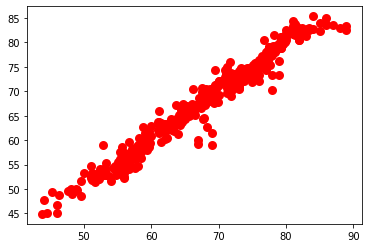

In [22]:
plt.scatter(y_test,y_pred,color='red', linewidth=3)
plt.show

In [23]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.0664727891156467
MSE: 2.628677482993194
RMSE: 1.621319673288767


In [24]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)
ridgeReg.score(X_test,y_test)

0.806962946243543

In [25]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.0002553015312827
MSE: 16.739315510046193
RMSE: 4.091370859509828


<function matplotlib.pyplot.show(*args, **kw)>

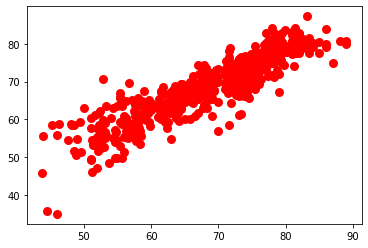

In [26]:
plt.scatter(y_test,pred,color='red', linewidth=3)
plt.show

In [27]:
from sklearn.externals import joblib
joblib.dump(model,'model.pkl')
    

D:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model.pkl']